In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'/Users/ratikpant/Desktop/banklending'

In [147]:
df = pd.read_csv('/Users/ratikpant/Desktop/banklending/dcr.csv')
income = pd.read_excel('/Users/ratikpant/Desktop/banklending/h08.xlsx', sheet_name = 'inc_by_state')
merge_df = pd.read_excel('/Users/ratikpant/Desktop/banklending/h08.xlsx', sheet_name = 'quarter')

In [145]:

income.head()

,State,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
0,United States,56520,53660,51940,51020,50050,49280,49780,50300,50230,48200,46330,44330,43320,42410,42230
1,Alabama,44510,42280,41380,43460,42590,40930,39980,44480,42210,37950,37150,36630,37260,37600,35160
2,Alaska,75110,67630,61140,63650,57430,57850,61600,63990,62990,56420,55890,55060,51840,52770,57360
3,Arizona,52250,49250,50600,47040,48620,46900,45740,46910,47220,46660,45250,43850,41170,39730,42700
4,Arkansas,42800,44920,39920,39020,41300,38590,36540,39590,40800,37060,36660,34980,32000,32390,33340


In [146]:
income.describe().T

,count,mean,std,min,25%,50%,75%,max
2015,52.0,57002.884615,9113.275887,40040.0,50792.5,56495.0,62027.5,75680.0
2014,52.0,55194.038462,9120.322118,35520.0,48952.5,54615.0,60715.0,76170.0
2013,52.0,52794.615385,8216.506691,39620.0,46142.5,52960.0,58385.0,71320.0
2012,52.0,51989.038462,8264.649088,36640.0,46137.5,50520.0,57080.0,71840.0
2011,52.0,50675.000000,7402.365679,39860.0,45185.0,49800.0,55522.5,68880.0
2010,52.0,50004.038462,7420.487870,38160.0,44877.5,49150.0,55390.0,66630.0
2009,52.0,49856.153846,7421.878139,35080.0,45252.5,49350.0,53767.5,64850.0
2008,52.0,50767.884615,7742.128282,36450.0,46092.5,50380.0,55095.0,66180.0
2007,52.0,50397.115385,7243.410619,37280.0,45955.0,48925.0,54305.0,67580.0
2006,52.0,48350.961538,7648.053773,34730.0,42760.0,48140.0,53962.5,68060.0


In [115]:
df.tail()

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,...,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res
62173,49972,52,25,52,145,NaN,180673.24,103.306966,7.5,5.15,...,708,79.8,7.5,AL,226.29,0,0,0,NaN,NaN
62174,49972,53,25,52,145,NaN,179944.95,95.736862,7.5,5.15,...,708,79.8,7.5,AL,226.29,0,0,0,NaN,NaN
62175,49972,54,25,52,145,NaN,179451.81,91.867079,7.5,5.15,...,708,79.8,7.5,AL,226.29,0,0,0,NaN,NaN
62176,49972,55,25,52,145,NaN,178952.48,91.560581,7.5,5.15,...,708,79.8,7.5,AL,226.29,0,0,0,NaN,NaN
62177,49972,56,25,52,145,NaN,178952.48,90.874242,7.5,5.15,...,708,79.8,7.5,AL,226.29,1,0,1,0.0,178952.48


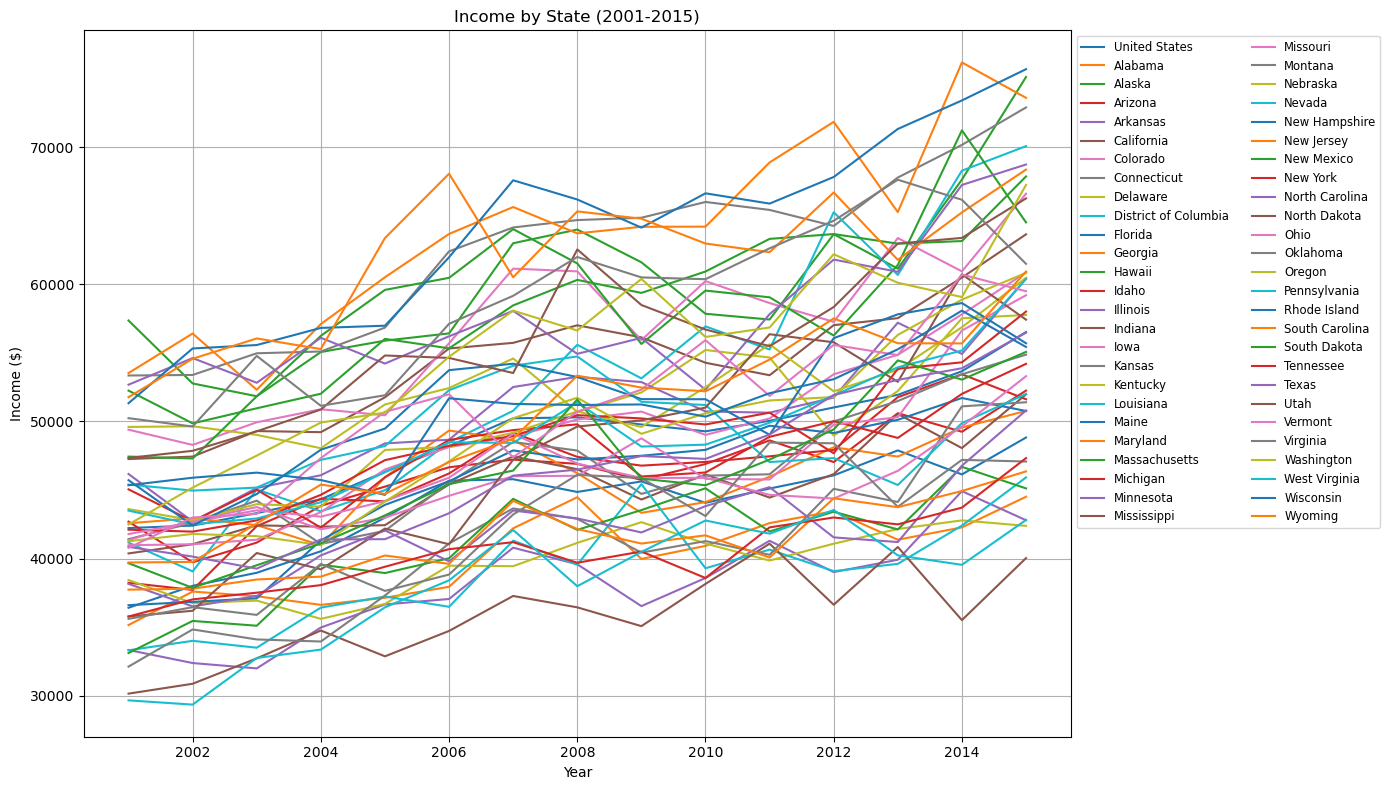

In [124]:
income.set_index('State', inplace=True)

# Selecting only columns that represent years (they should all be numeric)
income.columns = income.columns.astype(str)  
year_columns = income.columns[income.columns.str.isnumeric()]  

# Convert the remaining column names to integers
years = year_columns.astype(int)
income = income[year_columns]  

# Plotting each state's time series
plt.figure(figsize=(14, 8))

for state in income.index:
    plt.plot(years, income.loc[state], label=state)

plt.title('Income by State (2001-2015)')
plt.xlabel('Year')
plt.ylabel('Income ($)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()

plt.show()

In [132]:
#growth rate by state and time
growth_rate = income.pct_change(axis=1) * 100
print( growth_rate)

                      2015       2014       2013       2012       2011  \
State                                                                    
United States          NaN  -5.060156  -3.205367  -1.771275  -1.901215   
Alabama                NaN  -5.010110  -2.128666   5.026583  -2.001841   
Alaska                 NaN  -9.958727  -9.596333   4.105332  -9.772192   
Arizona                NaN  -5.741627   2.741117  -7.035573   3.358844   
Arkansas               NaN   4.953271 -11.130899  -2.254509   5.843157   
California             NaN  -4.949717  -4.893371  -0.886494  -6.401263   
Colorado               NaN  -8.498498   3.987529  -9.641786   2.392595   
Connecticut            NaN  -3.745370  -3.392246  -5.208026   1.821012   
Delaware               NaN  -0.415512  -9.214186  -6.223669  11.619359   
District of Columbia   NaN  -2.554588 -11.130639   7.531312 -15.325670   
Florida                NaN  -5.508908   3.792805  -3.800376  -2.083786   
Georgia                NaN  -2.383297 

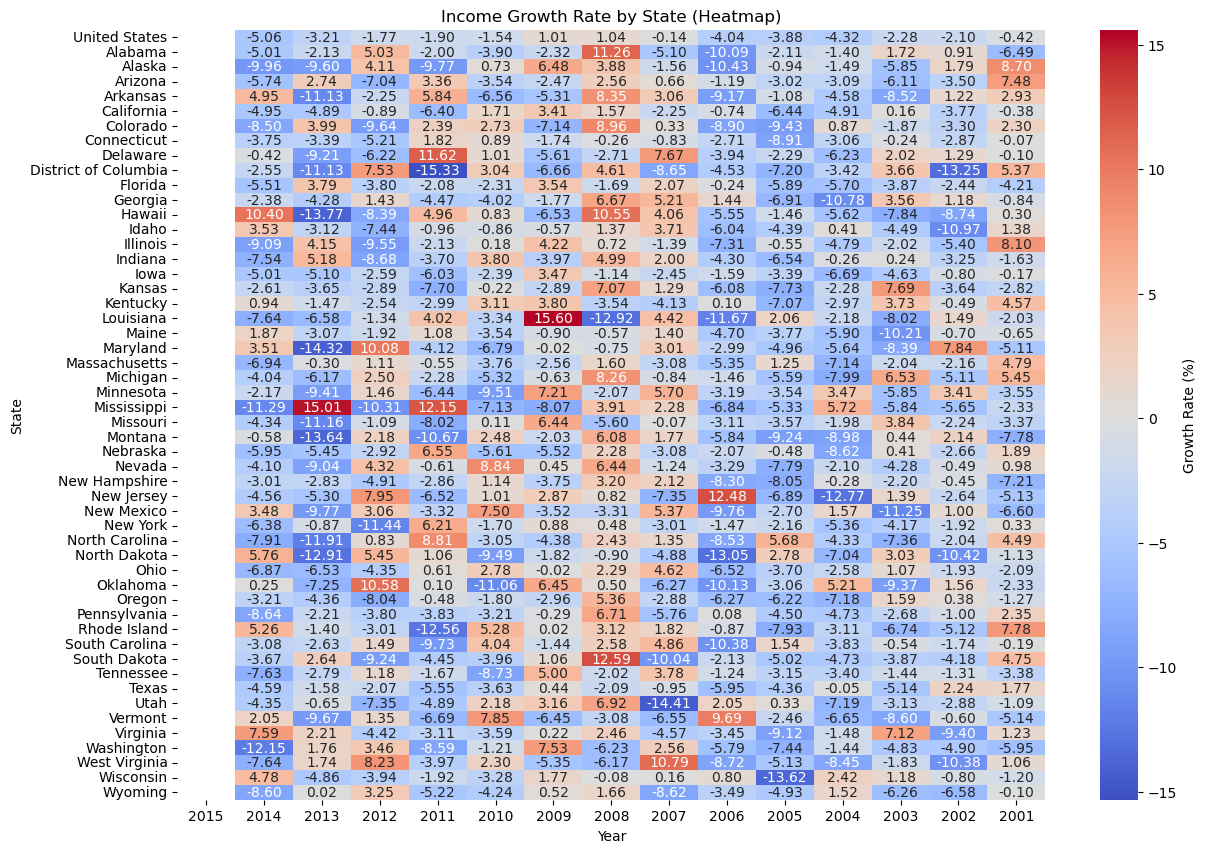

In [168]:
# Plotting the heatmap for growth rate values
plt.figure(figsize=(14, 10))
sns.heatmap(growth_rate, cmap="coolwarm", center=0, annot=True, fmt=".2f", cbar_kws={'label': 'Growth Rate (%)'})

plt.title('Income Growth Rate by State (Heatmap)')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62178 entries, 0 to 62177
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62178 non-null  int64  
 1   time                     62178 non-null  int64  
 2   orig_time                62178 non-null  int64  
 3   first_time               62178 non-null  int64  
 4   mat_time                 62178 non-null  int64  
 5   res_time                 1160 non-null   float64
 6   balance_time             62178 non-null  float64
 7   LTV_time                 62153 non-null  float64
 8   interest_rate_time       62178 non-null  float64
 9   rate_time                62178 non-null  float64
 10  hpi_time                 62178 non-null  float64
 11  gdp_time                 62178 non-null  float64
 12  uer_time                 62178 non-null  float64
 13  REtype_CO_orig_time      62178 non-null  int64  
 14  REtype_PU_orig_time   

In [137]:
df.head()

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,...,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res
0,4,25,-2,25,119,NaN,61031.10,33.911009,10.500,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NaN,NaN
1,4,26,-2,25,119,NaN,60882.42,34.007232,10.500,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NaN,NaN
2,4,27,-2,25,119,NaN,60729.80,34.335349,10.500,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NaN,NaN
3,4,28,-2,25,119,NaN,60576.14,34.672545,10.875,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NaN,NaN
4,4,29,-2,25,119,NaN,60424.39,34.951639,10.875,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NaN,NaN


In [149]:
merge_df.head()

,State,Year,Quarter,time,Income
0,United States,2015,1,57,56520
1,Alabama,2015,1,57,44510
2,Alaska,2015,1,57,75110
3,Arizona,2015,1,57,52250
4,Arkansas,2015,1,57,42800


In [150]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   State    3120 non-null   object
 1   Year     3120 non-null   int64 
 2   Quarter  3120 non-null   int64 
 3   time     3120 non-null   int64 
 4   Income   3120 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 122.0+ KB


In [160]:
merge_df['time'] = (merge_df['Year'] - 2001) * 4 + merge_df['Quarter']

In [157]:
# changing state names to abbreviation in merge_df
state_name_to_abbreviation = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'United States': 'US', 'Puerto Rico': 'PR'
}

# Apply this mapping to `State` column in `merged_df`
merge_df['State'] = merge_df['State'].map(state_name_to_abbreviation)

In [163]:
# merged state and time and stored the dataset in merged_df
merged_df = pd.merge(df, merge_df, how='inner', left_on=['state_orig_time', 'time'], right_on=['State', 'time'])

In [183]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61363 entries, 61154 to 61413
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       61363 non-null  int64  
 1   time                     61363 non-null  int64  
 2   orig_time                61363 non-null  int64  
 3   first_time               61363 non-null  int64  
 4   mat_time                 61363 non-null  int64  
 5   res_time                 1153 non-null   float64
 6   balance_time             61363 non-null  float64
 7   LTV_time                 61338 non-null  float64
 8   interest_rate_time       61363 non-null  float64
 9   rate_time                61363 non-null  float64
 10  hpi_time                 61363 non-null  float64
 11  gdp_time                 61363 non-null  float64
 12  uer_time                 61363 non-null  float64
 13  REtype_CO_orig_time      61363 non-null  int64  
 14  REtype_PU_orig_time    

In [165]:
merged_df.head()

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,...,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res,State,Year,Quarter,Income
0,4,25,-2,25,119,NaN,61031.10,33.911009,10.50,5.90,...,97.99,0,0,0,NaN,NaN,KY,2007,1,39450
1,1806,25,22,24,142,NaN,282391.72,85.876675,7.30,4.34,...,216.77,0,0,0,NaN,NaN,KY,2007,1,39450
2,5910,25,21,23,141,NaN,91797.71,73.356698,7.75,3.94,...,208.86,0,0,0,NaN,NaN,KY,2007,1,39450
3,12620,25,5,20,126,NaN,52640.42,46.541545,9.60,5.42,...,120.03,0,0,0,NaN,NaN,KY,2007,1,39450
4,12685,25,-3,20,117,NaN,33024.70,35.267403,8.50,5.81,...,95.10,0,0,0,NaN,NaN,KY,2007,1,39450


In [ ]:
#Estimate a basic credit risk model for mortgage default probabilities (PD). You may choose a logit or a probit model). Include two standard explanatory variables which are FICO and LTV at origination. Do not include further variables. Compute the estimated PD for all mortgage loans and periods. Plot the average probability of default by time in a chart. Provide your code, output for the model and interpret the output.

In [169]:
import statsmodels.api as sm

In [ ]:
#using the asked columns and dropping rows if it has missing values.
data = merged_df[['default_time', 'FICO_orig_time', 'LTV_orig_time', 'time']].dropna()


In [171]:
#independent variables
X = data[['FICO_orig_time', 'LTV_orig_time']]
X = sm.add_constant(X)

In [173]:
#target variable
y = data['default_time']

In [174]:
#fitting the logistic regression
logit_model = sm.Logit(y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.113921
         Iterations 8


In [175]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:           default_time   No. Observations:                61414
Model:                          Logit   Df Residuals:                    61411
Method:                           MLE   Df Model:                            2
Date:                Sat, 26 Oct 2024   Pseudo R-squ.:                 0.01581
Time:                        21:15:01   Log-Likelihood:                -6996.3
converged:                       True   LL-Null:                       -7108.7
Covariance Type:            nonrobust   LLR p-value:                 1.591e-49
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.3761      0.333     -7.132      0.000      -3.029      -1.723
FICO_orig_time    -0.0043      0.000    -11.989      0.000      -0.005      -0.004
LTV_orig_time      0.0194      0.003

In [177]:
data['PD'] = result.predict(X)

In [178]:
average_pd_by_time = data.groupby('time')['PD'].mean()

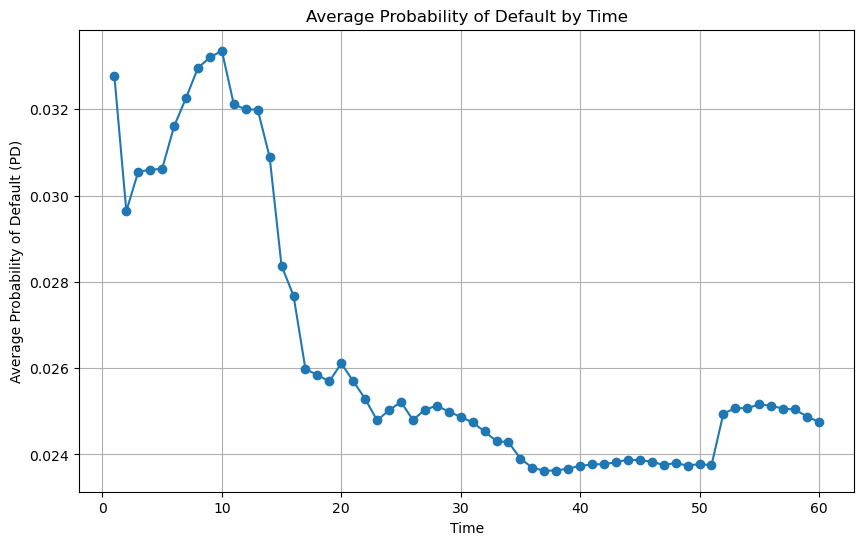

In [179]:
plt.figure(figsize=(10, 6))
plt.plot(average_pd_by_time.index, average_pd_by_time.values, marker='o')
plt.title('Average Probability of Default by Time')
plt.xlabel('Time')
plt.ylabel('Average Probability of Default (PD)')
plt.grid()
plt.show()

In [182]:
merged_df.sort_values(by=['State', 'time'], inplace=True)

# Calculate the percentage change in Income to get the income growth rate
merged_df['income_growth_rate'] = merged_df.groupby('State')['Income'].pct_change() * 100

# Drop rows with missing income growth rate data if any
merged_df = merged_df.dropna(subset=['income_growth_rate'])

In [184]:
data = merged_df[['default_time', 'FICO_orig_time', 'LTV_orig_time', 'income_growth_rate', 'time']]

# Define independent variables and add a constant term
X = data[['FICO_orig_time', 'LTV_orig_time', 'income_growth_rate']]
X = sm.add_constant(X)

# Define the dependent variable (default indicator)
y = data['default_time']

In [185]:
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display the model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.113931
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           default_time   No. Observations:                61363
Model:                          Logit   Df Residuals:                    61359
Method:                           MLE   Df Model:                            3
Date:                Sat, 26 Oct 2024   Pseudo R-squ.:                 0.01585
Time:                        22:28:33   Log-Likelihood:                -6991.2
converged:                       True   LL-Null:                       -7103.8
Covariance Type:            nonrobust   LLR p-value:                 1.538e-48
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.3762      0.333     -7.125      0.000      -3.030      -1.723
FICO_

In [187]:
data = data.copy()
data['PD'] = result.predict(X)

In [188]:
average_pd_by_time = data.groupby('time')['PD'].mean()

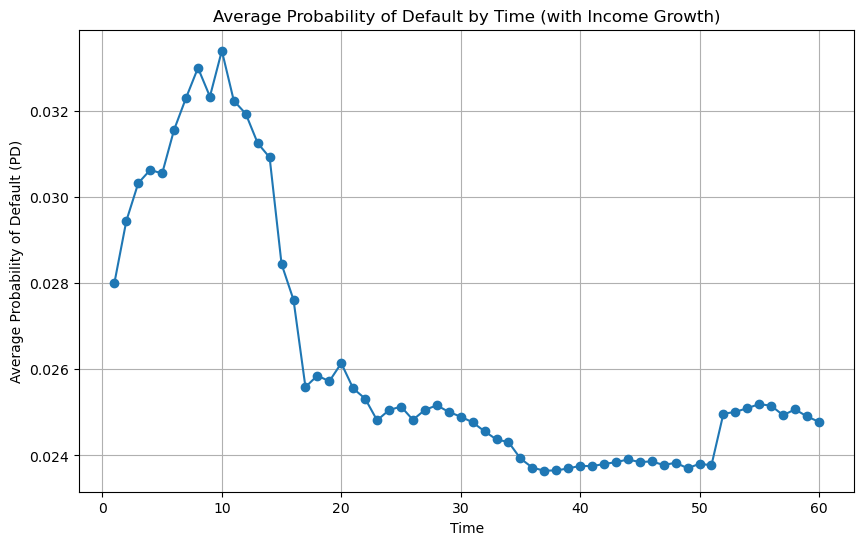

In [189]:
plt.figure(figsize=(10, 6))
plt.plot(average_pd_by_time.index, average_pd_by_time.values, marker='o')
plt.title('Average Probability of Default by Time (with Income Growth)')
plt.xlabel('Time')
plt.ylabel('Average Probability of Default (PD)')
plt.grid()
plt.show()

In [ ]:
#Run a linear regression model to predict LGD. Include the same set of explanatory variables used in the question 2B. Compute the estimated LGD for all mortgage loans and periods. Plot the average LGD by period. Provide your code, output, plot and interpret the output economically.

In [190]:
#storing features for linear model 
lgd_data = merged_df[['lgd_time', 'FICO_orig_time', 'LTV_orig_time', 'income_growth_rate', 'time']].dropna()

# Define independent variables and add a constant term for the regression model
X = lgd_data[['FICO_orig_time', 'LTV_orig_time', 'income_growth_rate']]
X = sm.add_constant(X)

# Define the dependent variable (LGD)
y = lgd_data['lgd_time']

In [191]:
# Fitting the linear regression model
linear_model = sm.OLS(y, X)
result = linear_model.fit()

# Display the model summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               lgd_time   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.021
Date:                Sun, 27 Oct 2024   Prob (F-statistic):             0.0288
Time:                        08:57:47   Log-Likelihood:                -683.61
No. Observations:                1515   AIC:                             1375.
Df Residuals:                    1511   BIC:                             1397.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1119      0

In [192]:
lgd_data['estimated_LGD'] = result.predict(X)

In [193]:
average_lgd_by_time = lgd_data.groupby('time')['estimated_LGD'].mean()

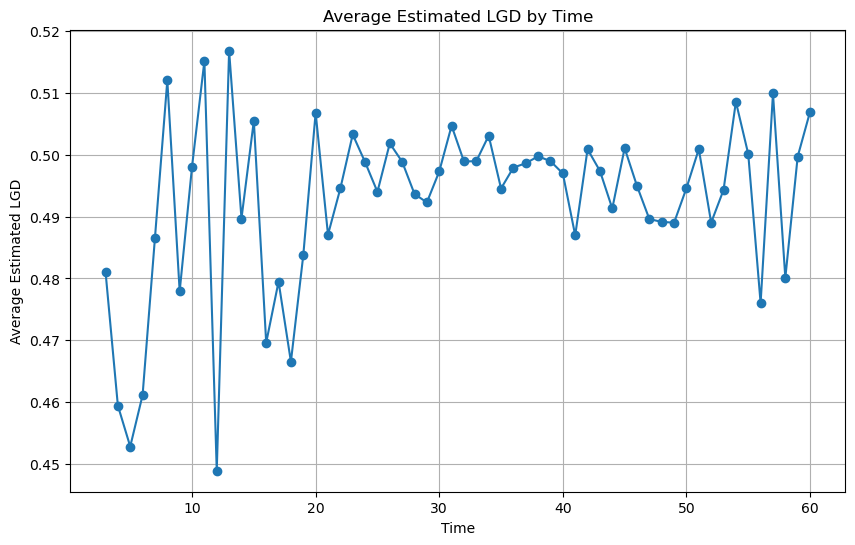

In [194]:
plt.figure(figsize=(10, 6))
plt.plot(average_lgd_by_time.index, average_lgd_by_time.values, marker='o')
plt.title('Average Estimated LGD by Time')
plt.xlabel('Time')
plt.ylabel('Average Estimated LGD')
plt.grid()
plt.show()